  ###                              <h3>train.csv</h3>
<ul>
    <li>Store - the store number </li>
    <li>Dept - the department number </li>
    <li>Date - the week</li>
    <li>Weekly_Sales -  sales for the given department in the given store</li>
    <li>IsHoliday - whether the week is a special holiday week</li>
    
</ul>

  ###                              <h3>test.csv</h3>
<ul>
    <li>Store - the store number </li>
    <li>Dept - the department number </li>
    <li>Date - the week</li>
    
   <li>IsHoliday - whether the week is a special holiday week</li>
    
</ul>

## you have to predict the weekly_Sales


###                                    <h3>features.csv</h3>

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:
<ul>
    <li>Store - the store number</li>
    <li>Date - the week</li>
    <li>Temperature - average temperature in the region</li>
    <li>Fuel_Price - cost of fuel in the region</li>
    <li>MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.</li>
    <li>CPI - the consumer price index</li>
    <li>Unemployment - the unemployment rate</li>
    <li>IsHoliday - whether the week is a special holiday week</li>
</ul>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [0]:
train = pd.read_csv('train.csv')
train = train[['Store','Dept','Date','Weekly_Sales','IsHoliday']]

In [0]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from google.colab import files
#uploaded = files.upload()

In [0]:
test = pd.read_csv('test.csv')

In [15]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [16]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [0]:
feature = pd.read_csv('features.csv')

In [18]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


train has very little information feature.csv has more information we have to merge the feature and the train

In [0]:
## we have to merge train already has the isHoliday so we have to drop the isHoliday in feature
feature = feature.drop('IsHoliday',1)

store = pd.read_csv('stores.csv',header=0)

In [20]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [0]:
## merging the train feature and the store

dataset=train.merge(store,how='left').merge(feature,how='left')

In [22]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [0]:
def scatter(dataset,column):
    plt.figure()
    plt.scatter(dataset[column],dataset['Weekly_Sales'])
    plt.ylabel('WEEKLY SALES')
    plt.xlabel(column)
    

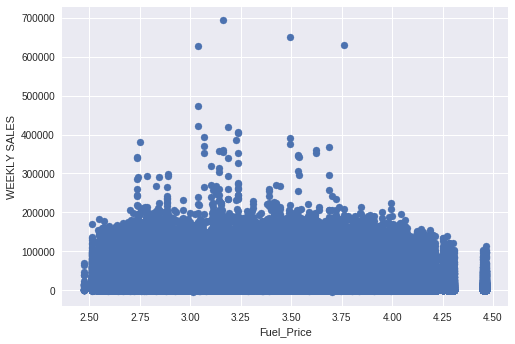

In [24]:
scatter(dataset, 'Fuel_Price')


In [0]:
def plot(dataset,column):
    plt.figure()
    plt.plot(dataset[column],dataset['Weekly_Sales'])
    plt.ylabel('WEEKLY SALES')
    plt.xlabel(column)
    

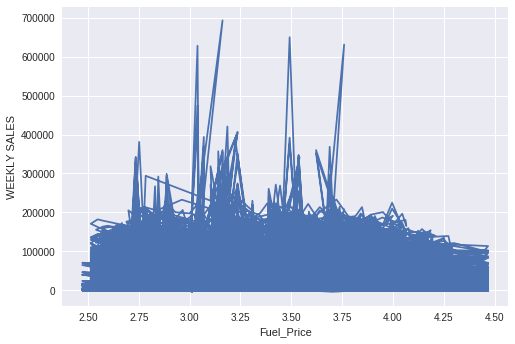

In [26]:
plot(dataset, 'Fuel_Price')

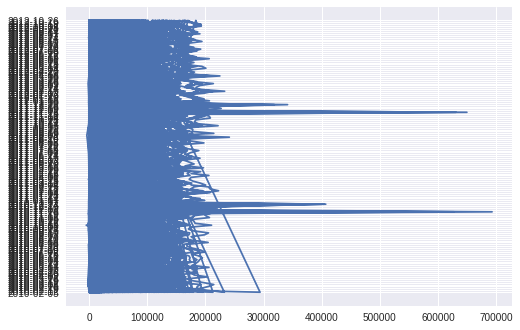

In [27]:
plt.plot(dataset['Weekly_Sales'],dataset['Date'])

In [0]:
## can plot the weekly sales based on the DEPT and The Store

def feature_based_result_plot(feture1,feture2):
    
    ## we plot based every two combination related to weekly sales
    ## not everything is compltable
    for x,data in dataset.groupby([feture1,feture2]):
        plt.title(x)
        plt.scatter(range(len(data)),group['Weekly_Sales'])
        plt.show()
        
        

In [0]:
#feature_based_result_plot('Store','Dept')

In [0]:
## Whats the problm using classification???
## cause these are continuous value

In [0]:
# Data Manupulation
d={True:1,False:0}

In [0]:
dataset['IsHoliday']=dataset['IsHoliday'].map(d)

In [33]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


# This is may be the best feature engineering When you have multiple parameter like you have type A,B,C,D you can do two things either you map them but the best thing is if you have more than two you can convert to the columns like A,B and C columns only  the tru colums have 1 other will have 0
# very useful

In [0]:
######## very useful
dataset = pd.get_dummies(dataset, columns=["Type"])

In [0]:
## ok now the markdown is is anothre pain 
## huge ammount of missing data
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [36]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
1,1,1,2010-02-12,46039.49,1,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,0
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,0,0
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,0,0
4,1,1,2010-03-05,21827.90,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,0,0


### now the date is another thing that the ML cant handle. the day we dont care harder to process but we can take the month .so we can extract the month
### lot of ways to extract we can change it to a time frame and extract the month store the column dataset['Month'] then get rid of the date

In [0]:
dataset['Month']=pd.to_datetime(dataset['Date']).dt.month

In [38]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Month
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0,2
1,1,1,2010-02-12,46039.49,1,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,0,2
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,0,0,2
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,0,0,2
4,1,1,2010-03-05,21827.90,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,0,0,3


In [0]:
#we gonna drop the Date column its useless now
dataset = dataset.drop('Date',1)

X = dataset.drop('Weekly_Sales',1)
Y= dataset['Weekly_Sales']

In [0]:
X=np.array(X)
Y=np.array(Y)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
## now prepare the test dataset


In [0]:
dataset_test=test.merge(store,how='left').merge(feature,how='left')

In [0]:
d={True:1,False:0}
dataset_test['IsHoliday']=dataset_test['IsHoliday'].map(d)

In [44]:
dataset_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,0,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,0,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,1,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,0,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [0]:
dataset_test = pd.get_dummies(dataset_test, columns=["Type"])

In [0]:
dataset_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [0]:
dataset_test['Month']=pd.to_datetime(dataset_test['Date']).dt.month

In [0]:
dataset_test = dataset_test.drop('Date',1)

In [49]:
dataset_test.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Month
0,1,1,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,1,0,0,11
1,1,1,0,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,1,0,0,11
2,1,1,0,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,1,0,0,11
3,1,1,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,0,0,11
4,1,1,0,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,1,0,0,11


In [0]:
## this dataset is the all the value except the weekly_sale just train the model and predict the y value with this

In [0]:
test=np.array(dataset_test)

In [0]:
## thats it now apply regression algorithm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [0]:
#ML=[]
#M=['SVR','KNeighborsRegressor','MLPRegressor','LinearRegression','RandomForestRegressor']
#Z=[SVR(),KNeighborsRegressor(),MLPRegressor(),LinearRegression(),RandomForestRegressor()]
#ML=[]
M=['SVR']
Z=[SVR()]


In [0]:
for model in Z:
    model.fit(X_train,y_train)      ## training the model this could take a little time
    accuracy=model.score(X_test,y_test)    ## comparing result with the test data set
    ML.append(accuracy)   ## saving the accuracy



In [0]:
d={'Accuracy':ML,'Algorithm':M}
df1=pd.DataFrame(d)

In [0]:
df1